Name: Madhav Jha

Roll: E3-48

Branch: CSE(AIML)

# DL lab: 1

Write a program to implement:
1. vanilla gradient descent
2. momentum based gradient descent

Consider two points (2, 0.3) and (6, 0.8)

Approximate these two points by using above mentioned algorithm also plot the approximation plot.

we have a single node:

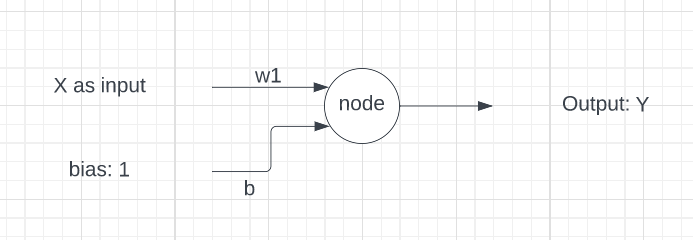

In [ ]:
import math

def sig(num):
  # 1/(1 + e^(-x))
  return 1/(1 + math.exp(-num))

def calc(x, w):
  res = x*w[0] + w[1];
  # res is currently the net result
  # we will calculate with activation sugmoid function now
  res = sig(res)
  return res

# change in weight i.e. derivative of sigmoid function
def cw(x, y, w):
  yDash = calc(x,w)
  dw = (yDash - y)*(1 - yDash)*x
  return dw

# calculate total error
def totalError(yDash, y):
  res = 0
  for i in range(len(y)):
    res += (y[i] - yDash[i])**2
  res = res/len(y)
  return round(res,4)

## 1. Vanilla Gradient Descent
Steps to train the node:
1. calculate yDash (the output we calculated)
2. calculate change in weight by gradient descent formula
  - i.e: dw = (yDash - y) * yDash * (1 - yDash) * xi
3. adjust new weights
  - wi+1 = wi - ita*dw

loop these 3 steps 1000 times

In [ ]:
x = [2, 6] # input
y = [0.3, 0.8] # output
w = [1, 0] # initial weights

In [ ]:
epoch = 1000
ita = 1
yDashArr = []
for i in range(epoch):
  # print("Iteration",i+1,":")
  # 1. calculate Y'
  yDashArr = []
  for i in x:
    yDash = calc(i,w)
    yDashArr.append(yDash)
  # print('calculated output: ',yDashArr)
  # print('total error: ', totalError(yDashArr, y))

  # 2. calc change in weight
  dw = 0
  for i in range(len(x)):
    dw += (yDashArr[i] - y[i]) * yDashArr[i] * (1 - yDashArr[i]) * x[i]

  # print('cahnge in weights: ',cws)

  # 3. adjust weights
  nw = []
  for i in range(len(w)):
    temp = w[i] - ita*dw
    nw.append(temp)
  # print("new weights: ", nw)
  # print()

  # set old weights to new weights
  w = nw
print('calculated output: ',yDashArr)
print('total error: ', totalError(yDashArr, y))
print("new weights: ", nw)

calculated output:  [0.4235467057202685, 0.6488820539481949]
total error:  0.0191
new weights:  [0.3768397168174921, -0.6231602831825076]


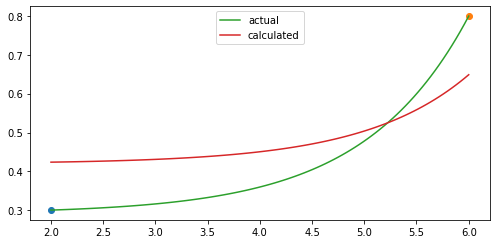

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

def draw_curve(p1, p2):
   a = (p2[1] - p1[1]) / (np.cosh(p2[0]) - np.cosh(p1[0]))
   b = p1[1] - a * np.cosh(p1[0])
   x = np.linspace(p1[0], p2[0], 100)
   y = a * np.cosh(x) + b
   return x, y

# actual point
p1 = [x[0], y[0]]
p2 = [x[1], y[1]]
plt.plot(p1[0], p1[1], 'o')
plt.plot(p2[0], p2[1], 'o')

cx, cy = draw_curve(p1, p2)
plt.plot(cx, cy, label="actual")

# the curve we have
py1 = [x[0], yDashArr[0]]
py2 = [x[1], yDashArr[1]]
cx, cy = draw_curve(py1, py2)
plt.plot(cx, cy, label="calculated")
leg = plt.legend(loc='upper center')
plt.show()

## 2. Momentum based
Steps to train the node:
1. calculate yDash (the output we calculated)
2. calculate change in weight by gradient descent formula
  - newUpdate = gamma*oldUpdate + ita*dw
  - i.e: dw = (yDash - y) * yDash * (1 - yDash) * xi
3. adjust new weights
  - wi+1 = wi - newUpdate

loop these 3 steps 1000 times

In [ ]:
# reset 
x = [2, 6] # input
y = [0.3, 0.8] # output
w = [1, -0.5] # initial weights

In [ ]:
epoch = 1000
ita = 1
gamma = 0.1
yDashArr = []
update = 0
for i in range(epoch):
  # print("Iteration",i+1,":")
  # 1. calculate Y'
  yDashArr = []
  for i in x:
    yDash = calc(i,w)
    yDashArr.append(yDash)
  # print('calculated output: ',yDashArr)
  # print('total error: ', totalError(yDashArr, y))

  # 2. calc change in weight
  dw = 0
  for i in range(len(x)):
    dw += (yDashArr[i] - y[i]) * yDashArr[i] * (1 - yDashArr[i]) * x[i]

  newUpdate = gamma*update + ita*dw
  # print('cahnge in weights: ',cws)

  # 3. adjust weights
  nw = []
  for i in range(len(w)):
    temp = w[i] - newUpdate
    nw.append(temp)
  # print("new weights: ", nw)
  # print()

  # set old weights to new weights
  w = nw
print('calculated output: ',yDashArr)
print('total error: ', totalError(yDashArr, y))
print("new weights: ", nw)

calculated output:  [0.4159611578600088, 0.7699667709285674]
total error:  0.0072
new weights:  [0.362448719220518, -1.137551280779484]


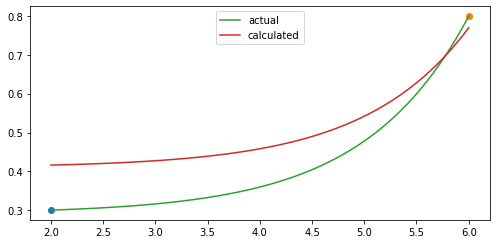

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

def draw_curve(p1, p2):
   a = (p2[1] - p1[1]) / (np.cosh(p2[0]) - np.cosh(p1[0]))
   b = p1[1] - a * np.cosh(p1[0])
   x = np.linspace(p1[0], p2[0], 100)
   y = a * np.cosh(x) + b
   return x, y

# actual point
p1 = [x[0], y[0]]
p2 = [x[1], y[1]]
plt.plot(p1[0], p1[1], 'o')
plt.plot(p2[0], p2[1], 'o')

cx, cy = draw_curve(p1, p2)
plt.plot(cx, cy, label="actual")

# the curve we have
py1 = [x[0], yDashArr[0]]
py2 = [x[1], yDashArr[1]]
cx, cy = draw_curve(py1, py2)
plt.plot(cx, cy, label="calculated")
leg = plt.legend(loc='upper center')
plt.show()